In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### Read the dataset from excel file

In [17]:
df = pd.read_excel("TEN_GOP Twitter - Top Social Interactions.xlsx")

In [18]:
df.head()

,Source,Followers,Date,Interactions,Post Type
0,1001,229484.0,Sun Aug 13 2017 22:25:02 GMT-0500 (CDT),30470.0,Twitter
1,1002,20775598.0,Sun Apr 16 2017 16:26:13 GMT-0500 (CDT),25277.0,Twitter
2,1003,0.0,Sat Jun 17 2017 17:01:00 GMT-0500 (CDT),16205.0,Facebook
3,1004,145608.0,Sat Aug 12 2017 16:59:58 GMT-0500 (CDT),14609.0,Twitter
4,1005,560378.0,Tue Feb 14 2017 20:48:34 GMT-0600 (CST),13058.0,Twitter


### Check dimension

In [19]:
df.shape

(780, 5)

### Check data types

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 5 columns):
Source          748 non-null object
Followers       442 non-null float64
Date            442 non-null object
Interactions    442 non-null float64
Post Type       442 non-null object
dtypes: float64(2), object(3)
memory usage: 30.5+ KB


### Check missing values

In [21]:
df.isna().sum()

Source           32
Followers       338
Date            338
Interactions    338
Post Type       338
dtype: int64

### Remove missing rows

In [22]:
df.dropna(inplace=True)

In [23]:
df.isna().sum()

Source          0
Followers       0
Date            0
Interactions    0
Post Type       0
dtype: int64

### Check frequency of Interactions in different social media platforms

In [28]:
df_sm = df['Post Type'].value_counts()

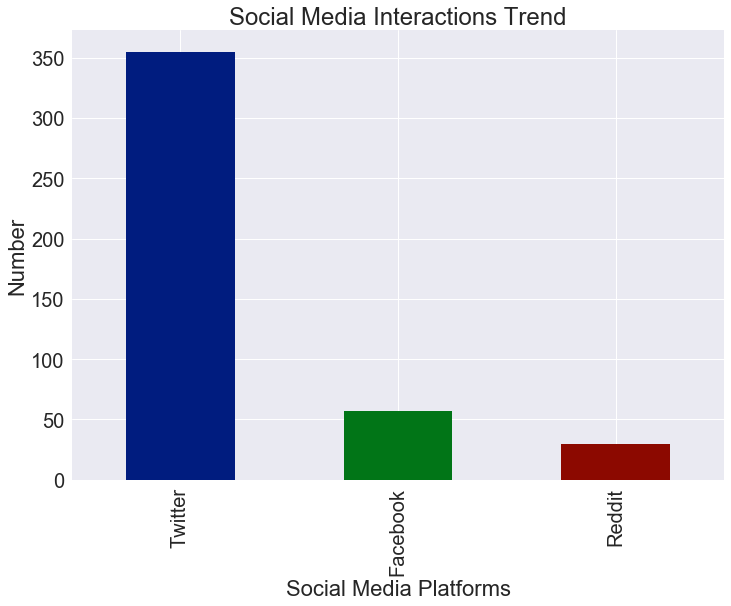

In [31]:
sns.set(style='darkgrid', palette='dark', font_scale=2, rc={'figure.figsize':(11.7,8.27)})
plt.title('Social Media Interactions Trend')
df_sm.plot.bar()
plt.ylabel('Number')
plt.xlabel('Social Media Platforms')
plt.show()

### Check trends of having followers in different social media platforms

In [32]:
df_sm = df.groupby('Post Type')['Followers'].sum()

In [34]:
df_sm

Post Type
Facebook    25799260.0
Reddit      10125366.0
Twitter     81372212.0
Name: Followers, dtype: float64

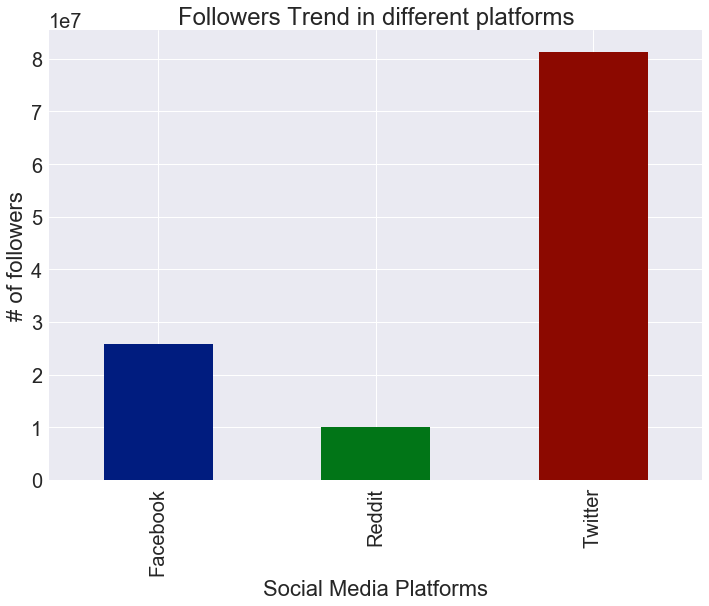

In [37]:
sns.set(style='darkgrid', palette='dark', font_scale=2, rc={'figure.figsize':(11.7,8.27)})
plt.title('Followers Trend in different platforms')
df_sm.plot.bar()
plt.ylabel('# of followers')
plt.xlabel('Social Media Platforms')
plt.show()

### Get users having top 10 highest number of followers

In [42]:
df_sm = df.sort_values('Followers', ascending=False)

In [45]:
df_sm[['Source','Followers','Interactions','Post Type']].head(10)

,Source,Followers,Interactions,Post Type
1,1002,20775598.0,25277.0,Twitter
5,1006,3465075.0,11038.0,Twitter
72,1073,2864927.0,1019.0,Twitter
111,1112,2569646.0,652.0,Facebook
182,1183,2154565.0,327.0,Twitter
27,1028,1832465.0,3249.0,Facebook
130,1131,1661656.0,508.0,Twitter
31,1032,1533486.0,2853.0,Twitter
43,1044,1413222.0,1795.0,Facebook
28,1029,1301884.0,3210.0,Facebook


### Get top 10 users having highest number of followers in Twitter

In [50]:
df_sm = df[df['Post Type']=='Twitter']
df_sm = df_sm.sort_values('Followers', ascending=False)

In [51]:
df_sm.head(10)

,Source,Followers,Date,Interactions,Post Type
1,1002,20775598.0,Sun Apr 16 2017 16:26:13 GMT-0500 (CDT),25277.0,Twitter
5,1006,3465075.0,Thu Feb 16 2017 19:55:47 GMT-0600 (CST),11038.0,Twitter
72,1073,2864927.0,Thu Oct 06 2016 14:18:25 GMT-0500 (CDT),1019.0,Twitter
182,1183,2154565.0,Thu Jan 26 2017 16:39:59 GMT-0600 (CST),327.0,Twitter
130,1131,1661656.0,Tue Dec 06 2016 01:41:08 GMT-0600 (CST),508.0,Twitter
31,1032,1533486.0,Sun Oct 09 2016 20:41:43 GMT-0500 (CDT),2853.0,Twitter
202,1203,1300749.0,Sat Sep 17 2016 21:34:51 GMT-0500 (CDT),289.0,Twitter
42,1043,1247182.0,Mon May 22 2017 15:35:06 GMT-0500 (CDT),1808.0,Twitter
63,1064,1049472.0,Sat Apr 22 2017 18:53:10 GMT-0500 (CDT),1217.0,Twitter
13,1014,1040684.0,Tue Nov 08 2016 16:00:03 GMT-0600 (CST),5189.0,Twitter


### Get top 10 users having highest number of followers in Facebook

In [52]:
df_sm = df[df['Post Type']=='Facebook']
df_sm = df_sm.sort_values('Followers', ascending=False)

In [53]:
df_sm.head(10)

,Source,Followers,Date,Interactions,Post Type
111,1112,2569646.0,Sun Jul 30 2017 10:00:00 GMT-0500 (CDT),652.0,Facebook
27,1028,1832465.0,Wed Dec 07 2016 07:00:00 GMT-0600 (CST),3249.0,Facebook
43,1044,1413222.0,Mon Dec 19 2016 20:43:10 GMT-0600 (CST),1795.0,Facebook
28,1029,1301884.0,Thu Dec 08 2016 14:00:00 GMT-0600 (CST),3210.0,Facebook
187,1188,1269743.0,Sun Jul 30 2017 10:15:01 GMT-0500 (CDT),319.0,Facebook
341,1342,1151478.0,Fri Dec 09 2016 07:00:00 GMT-0600 (CST),149.0,Facebook
12,1013,980144.0,Thu Jan 19 2017 20:13:01 GMT-0600 (CST),5287.0,Facebook
226,1227,959889.0,Sun Jul 30 2017 10:30:01 GMT-0500 (CDT),251.0,Facebook
38,1039,955130.0,Thu Dec 08 2016 12:35:01 GMT-0600 (CST),2024.0,Facebook
94,1095,952811.0,Sun Jul 30 2017 10:45:00 GMT-0500 (CDT),773.0,Facebook


### Get top 10 users having highest number of followers in Reddit

In [55]:
df_sm = df[df['Post Type']=='Reddit']
df_sm = df_sm.sort_values('Followers', ascending=False)

In [56]:
df_sm.head()

,Source,Followers,Date,Interactions,Post Type
402,1403,479018.0,Thu Aug 17 2017 15:54:27 GMT-0500 (CDT),111.0,Reddit
15,1016,475881.0,Mon Aug 14 2017 07:50:47 GMT-0500 (CDT),4435.0,Reddit
320,1321,475881.0,Mon Aug 14 2017 08:02:57 GMT-0500 (CDT),167.0,Reddit
308,1309,471667.0,Thu Aug 10 2017 17:13:21 GMT-0500 (CDT),172.0,Reddit
172,1173,469724.0,Sun Jul 16 2017 18:24:03 GMT-0500 (CDT),352.0,Reddit


### Find the correlation between number of followers and interactions

In [59]:
df[['Followers','Interactions']].corr()

,Followers,Interactions
Followers,1.000000,0.510615
Interactions,0.510615,1.000000


## Feature Engineering

### One hot encoding of Post Type

There are 3 types of Post - Twitter, Facebook and Reddit

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = df[['Followers', 'Post Type']]
y = df.Interactions

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [84]:
one_hot = pd.get_dummies(X_train['Post Type'])
X_train = X_train.join(one_hot)

In [85]:
X_train.head()

,Followers,Post Type,Facebook,Reddit,Twitter
285,83525.0,Twitter,0,0,1
271,106648.0,Twitter,0,0,1
192,24101.0,Twitter,0,0,1
89,187264.0,Twitter,0,0,1
181,451099.0,Facebook,1,0,0


In [86]:
one_hot = pd.get_dummies(X_test['Post Type'])
X_test = X_test.join(one_hot)

In [87]:
X_test.head()

,Followers,Post Type,Facebook,Reddit,Twitter
100,0.0,Twitter,0,0,1
128,149398.0,Twitter,0,0,1
253,57672.0,Twitter,0,0,1
144,719823.0,Twitter,0,0,1
295,75542.0,Twitter,0,0,1


In [94]:
X_train.drop('Post Type', axis = 1, inplace=True)

In [95]:
X_test.drop('Post Type', axis = 1, inplace=True)

In [111]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [112]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## KNN

In [105]:
from sklearn.neighbors import KNeighborsRegressor

In [133]:
model = KNeighborsRegressor()

In [134]:
model.fit(X_train_std, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [135]:
pred = model.predict(X_test_std)

In [136]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,pred))

855.4438649766133

## SVM

In [165]:
from sklearn.svm import SVR

In [166]:
model = SVR(C=1000, kernel='linear')

In [167]:
model.fit(X_train_std, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [168]:
pred = model.predict(X_test_std)

In [169]:
np.sqrt(mean_squared_error(y_test,pred))

582.5355867418876